In [0]:
!pip install imageai

     |████████████████████████████████| 184kB 4.8MB/s 


In [0]:
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 49kB/s 
     |████████████████████████████████| 368kB 41.4MB/s 
     |████████████████████████████████| 3.2MB 51.2MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1


In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [0]:
cd drive/My\ Drive/anno

/content/drive/My Drive/anno


In [0]:
ls

hololens/  pretrained-yolov3.h5


In [0]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()

In [0]:
trainer.setDataDirectory(data_directory="hololens")
trainer.setTrainConfig(object_names_array=["hololens"], batch_size=4, num_experiments=1, train_from_pretrained_model="pretrained-yolov3.h5")
trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.78
Anchor Boxes generated.
Detection configuration saved in  hololens/json/detection_config.json
Training on: 	['hololens']
Training with Batch Size:  4
Number of Experiments:  1
Training with transfer learning from pretrained Model


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/1
480/480 [==============================] - 406s 846ms/step - loss: 29.1107 - yolo_layer_4_loss: 3.3923 - yolo_layer_5_loss: 9.4971 - yolo_layer_6_loss: 16.2214 - val_loss: 14.1199 - val_yolo_layer_4_loss: 2.2829 - val_yolo_layer_5_loss: 3.7700 - val_yolo_layer_6_loss: 4.0640


In [0]:
metrics = trainer.evaluateModel(model_path="hololens/models", json_path="hololens/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)
print(metrics)

Starting Model evaluation....


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model File:  hololens/models/detection_model-ex-001--loss-0029.111.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
hololens: 0.4152
mAP: 0.4152
[{'model_file': 'hololens/models/detection_model-ex-001--loss-0029.111.h5', 'using_iou': 0.5, 'using_object_threshold': 0.3, 'using_non_maximum_suppression': 0.5, 'average_precision': {'hololens': 0.4152154346528261}, 'map': 0.4152154346528261}]


In [0]:
ls

cache/             hololens_train.pkl  logs/    train/
hololens_test.pkl  json/               models/  validation/


In [0]:
cd hololens

/content/drive/My Drive/anno/hololens


In [0]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("models/detection_model-ex-001--loss-0029.111.h5")
detector.setJsonPath("json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image="holo1.jpg", output_image_path="holo1-detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

hololens  :  57.25191831588745  :  [605, 56, 764, 127]


In [0]:
from IPython.display import Image

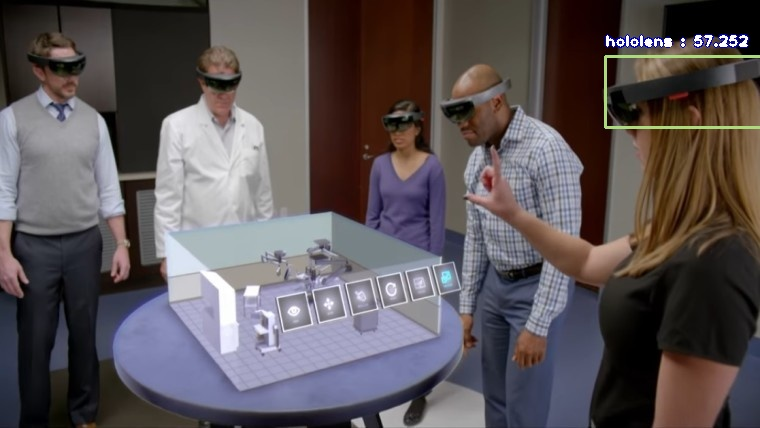

In [0]:
Image('holo1-detected.jpg')